In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in this case because we take only the last two columns and they have similar scale.

In [6]:
df2 = df.iloc[:, 3:]
df2.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


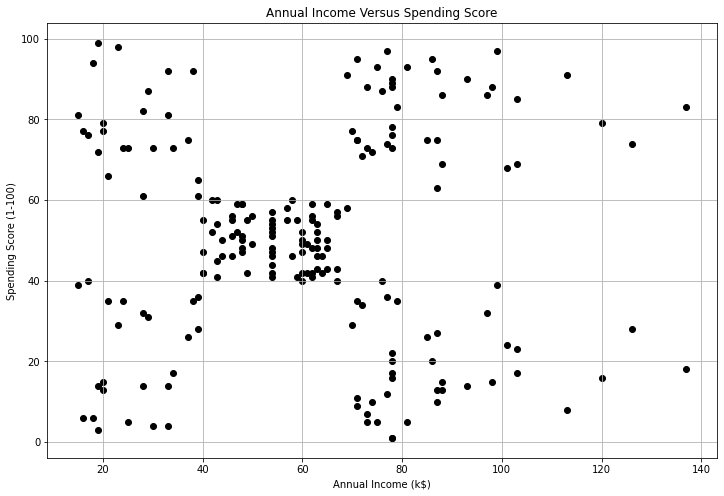

In [7]:
# We will plot the data.

plt.scatter(df2["Annual Income (k$)"], 
            df2["Spending Score (1-100)"],
            c='black',
            marker='o')
plt.title('Annual Income Versus Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

- K-Means

- plot the elbow rule




In [8]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.title('Number of clusters Versus Distortion')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    return distortions

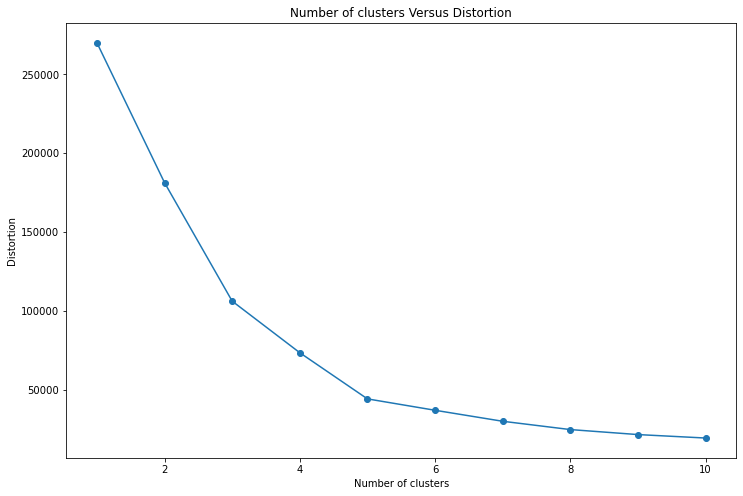

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

In [9]:
df2.pipe(plot_distortion)

From the elbow plot, the optimal number of clusters is 5.

* fit model with optimal number of clusters

In [10]:
km = KMeans(n_clusters=5, 
            n_init=10, 
            random_state=0)

df2["Clusters"] = km.fit_predict(df2)
df2.head(10)

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
5,17,76,1
6,18,6,3
7,18,94,1
8,19,3,3
9,19,72,1


* define function plot_clusters (similarly to what we have done in the walkthrough)

In [11]:
def plot_clusters(df, plt_cluster_centers = False):
    """Returns a plot of clusters and their centroids from a dataframe with 2 
    columns and an extra column of cluster labels."""
    
    X_centroids = []
    Y_centroids = []

    for cluster in set(df.iloc[:, 2]):
        mask = (df.iloc[:, 2] == cluster)
        x = df[mask].iloc[:, 0]
        y = df[mask].iloc[:, 1]
        X_centroids.append(x.mean())
        Y_centroids.append(y.mean())

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.title('Cluster Plot')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid()
    plt.show()    

* plot clusters

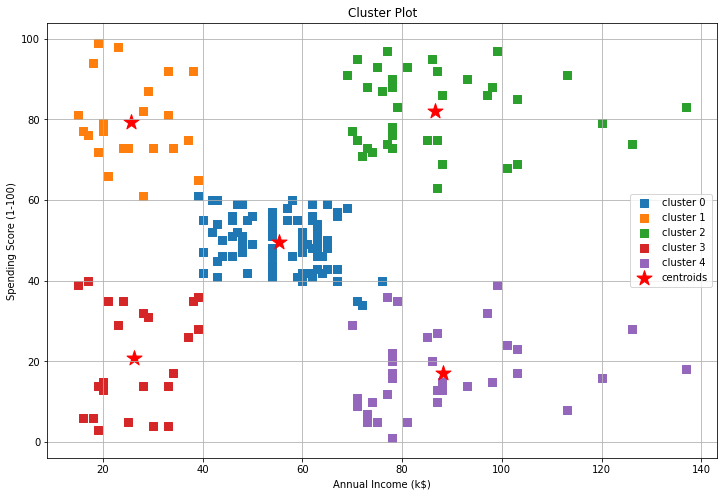

In [12]:
df2.pipe(plot_clusters, plt_cluster_centers=True)